# Исследование компьютерных игр, продаваемых по всему миру


Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Эти данные помогут достич нашу цель - выбрать наиболее перспектвные игры и спланировать рекламную кампанию.

Наши задача:
- обработать данные из открытых источников;
- выявить закономерности, определяющие успешность игры, в т.ч. в разрезе регионов.
 

### Окрытие файла с данными, изучение основной информации

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

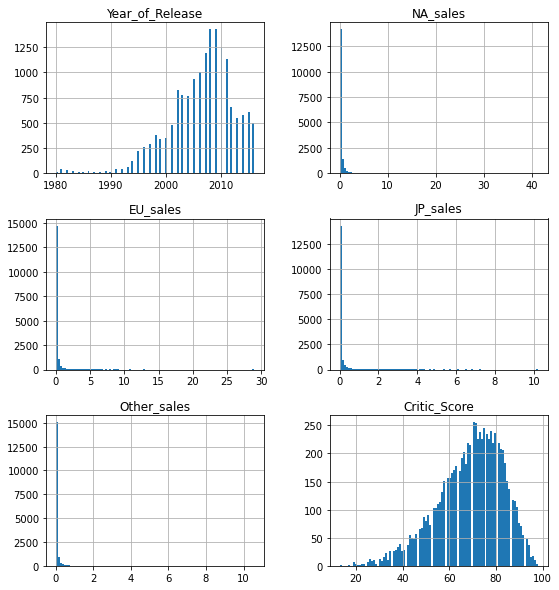

In [5]:
data.hist(figsize=(9, 10),bins=100)

### Предобработка данных

#### Отредактируем названия столбцов

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Заполнение пропусков и приведение в соответствие типа данных

Проверим на аномалии столбцы с продажами, остальные колонки посмотрим в следующей части.

In [8]:
data.sort_values(by='na_sales').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.0,0.00,0.01,0.0,NaN,NaN,NaN
12667,Quiz! Hexagon II,DS,2010.0,Misc,0.0,0.00,0.06,0.0,NaN,NaN,NaN
12675,Daito Giken Koushiki Pachi-Slot Simulator: Shi...,PS2,2008.0,Misc,0.0,0.00,0.06,0.0,NaN,NaN,NaN
4489,DanceStar Party,PS3,2011.0,Misc,0.0,0.34,0.00,0.1,NaN,NaN,NaN
12677,Tanjou S Debut,SAT,1996.0,Simulation,0.0,0.00,0.06,0.0,NaN,NaN,NaN


In [9]:
data.sort_values(by='eu_sales').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.0,0.01,0.00,NaN,NaN,NaN
12660,Imagine: Resort Owner,DS,2010.0,Strategy,0.05,0.0,0.00,0.00,NaN,tbd,E
10314,The BIGS,PSP,2007.0,Sports,0.10,0.0,0.00,0.01,72.0,tbd,E
12662,Paws & Claws: Pampered Pets 2,DS,2011.0,Simulation,0.05,0.0,0.00,0.00,NaN,NaN,NaN
12663,Policenauts,3DO,1995.0,Adventure,0.00,0.0,0.06,0.00,NaN,NaN,NaN


In [10]:
data.sort_values(by='jp_sales').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8357,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,0.12,0.04,0.0,0.00,NaN,NaN,NaN
12379,Panzer Tactics,DS,2007.0,Strategy,0.06,0.00,0.0,0.00,NaN,NaN,NaN
7236,From Russia With Love,GC,2005.0,Action,0.17,0.04,0.0,0.01,70.0,8.5,T
7237,Family Fest presents: Movie Games,Wii,2008.0,Action,0.20,0.01,0.0,0.02,NaN,tbd,E10+
7238,Guitar Hero: Smash Hits,PS2,2009.0,Misc,0.11,0.01,0.0,0.10,69.0,8.3,T


In [11]:
data.sort_values(by='other_sales').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8357,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,0.12,0.04,0.00,0.0,NaN,NaN,NaN
12249,Penguins of Madagascar,3DS,2014.0,Action,0.00,0.06,0.00,0.0,51.0,tbd,E
12250,12-Sai. Honto no Kimochi,3DS,2014.0,Adventure,0.00,0.00,0.07,0.0,NaN,NaN,NaN
12251,Parlor! Mini 2,SNES,1996.0,Misc,0.00,0.00,0.07,0.0,NaN,NaN,NaN
12252,"Flower, Sun, and Rain",DS,2008.0,Adventure,0.06,0.00,0.00,0.0,54.0,7.1,T


Игры с нулевыми продажами удалять не будем, т.к. они могут понадобиться для заполнения пропусков и для определения рискованных видов игр.

Аномально большие значения отсутствуют.

#### Обработаем пропуски

##### Проверим столбец 'name'

In [12]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Игры производства sega, но не известно название игр и жанр, поэтому смысловой нагрузки они не несут и мы их удаляем.

In [13]:
data = data.dropna(subset=['name']).reset_index(drop=True) 

##### Проверим столбец 'year_of_release'

Проверим на аномали столбец 'year_of_release'.

In [14]:
data.sort_values(by='year_of_release', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16712,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
4767,Dragon Quest Builders: Revive Alefgard,PS4,2016.0,Role-Playing,0.04,0.11,0.22,0.03,NaN,NaN,NaN
4912,Until Dawn: Rush of Blood,PS4,2016.0,Adventure,0.18,0.15,0.00,0.07,72.0,8,M
4886,Dark Souls III,XOne,2016.0,Role-Playing,0.26,0.09,0.00,0.04,87.0,8.6,NaN
16401,Dynasty Warriors: Eiketsuden,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Аномально маленькие и большие значения отсутствуют.

In [15]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
269/16713

0.016095255190570215


Восстанавливать данную информацию крайне сложно. Доля пропусков от всей информации составляет менее 2 %, поэтому мы их удалим.


Поменять тип данных

In [17]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True) 

Поменять тип данных

In [18]:
data['year_of_release'] = data['year_of_release'].astype(int)

Проверим на аномалии столбец 'critic_score'.

In [19]:
data.sort_values(by='critic_score').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13475,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.0,0.01,13.0,1,M
10497,Leisure Suit Larry: Box Office Bust,PS3,2009,Adventure,0.06,0.03,0.0,0.01,17.0,1.7,M
9856,Rugby 15,PS4,2015,Sports,0.04,0.06,0.0,0.02,19.0,3.4,E
15098,Balls of Fury,Wii,2007,Sports,0.02,0.00,0.0,0.00,19.0,2.8,E10+
11941,Anubis II,Wii,2007,Platform,0.06,0.00,0.0,0.00,19.0,2.7,E


Все значения в пределах нормы.

In [20]:
data['critic_score'].isna().sum()

8461

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [22]:
8461/16444

0.5145341765993675

In [23]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])


Доля пропусков в столце 'critic_score' составляет 51%. Заполнить данные пропуски не представляется возможным и удалить мы их не можем, т.к. это более от всей информации. Заполним пропуски значениями заглушками  -  "-1".
     

In [24]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [25]:
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Проверим пропуски в столбце 'rating'

In [26]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
data['rating'].isna().sum()

6676

In [28]:
6676/16444

0.40598394551204087


Пропуски также нельзя удалять и не заполнить, поэтому заменим пропуски на значения заглушки  -  "-1".
 

In [29]:
data['rating'] = data['rating'].fillna('nan')

In [30]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Скорее всего появление значения 'tbd' связано с ошибкой аннотации к значению/типу переменной при попытке описать пропуск. Поэтому заменим 'tbd' на 'NaN' в столбце "user_score", для этого напишем функцию, затем переведем в числовой формат и заполним пропуски.

In [31]:
import numpy as np

def replace_user_scores(wrong_user_scores, correct_user_score):
    data['user_score'] = data['user_score'].replace(wrong_user_scores, correct_user_score)

replace_user_scores('tbd', np.nan)

In [32]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [33]:
data['user_score'] = pd.to_numeric(data['user_score'])

Проверим на аномалии столбец 'user_score'.

In [34]:
data.sort_values(by='user_score', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14184,Breath of Fire III,PSP,2005,Role-Playing,0.00,0.02,0.00,0.01,-1.0,9.7,T
8834,Boktai: The Sun is in Your Hand,GBA,2003,Role-Playing,0.10,0.04,0.00,0.00,83.0,9.6,E
3369,Harvest Moon: Friends of Mineral Town,GBA,2003,Simulation,0.34,0.13,0.11,0.01,81.0,9.6,E
9945,Cory in the House,DS,2007,Action,0.10,0.00,0.00,0.01,-1.0,9.5,E
1627,Golden Sun: The Lost Age,GBA,2002,Role-Playing,0.61,0.27,0.27,0.07,86.0,9.5,E


Все значения в пределах нормы.

In [35]:
data['user_score'].isna().sum()

8981

In [36]:
8981/16444

0.5461566528825104


Пропуски также нельзя удалять и не заполнить, поэтому заменим пропуски на значения заглушки  -  "-1".
 

In [37]:
data['user_score'] = data['user_score'].fillna(-1)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Большая часть информации отсутствовала по оценкам и рейтингам. Это может быть связано с тем, что датасет собран из разных источников и при объединении таблиц произошел сбой. 
Либо некоторые игры не оценивались и им не присваивался рейтинг/оценка.

#### Суммарные продажи во всех регионах

In [39]:
data['total_sale'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [40]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,nan,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,nan,31.38


### Исследовательский анализ

#### Посмотрим на продажи игр по годам

In [41]:
data_year = data.pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').reset_index()
display(data_year)

,year_of_release,total_sale
0,1980,11.38
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.35
5,1985,53.95
6,1986,37.08
7,1987,21.70
8,1988,47.21
9,1989,73.45


<AxesSubplot:xlabel='year_of_release'>

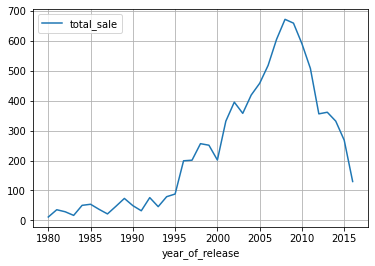

In [40]:
data_year.plot(x='year_of_release', y='total_sale', grid=True)

В 1996 году спрос на игры вырос более чем в 2 раза по сравнению с прошлым годам. По всей видимости, произошли качественные измения в сфере компьютерных игр (в т.ч. ПК стали доступны большому количеству населения), что способствовало росту спроса. В связи с этим годы игры, выпущенные до 1996 г., нет смысла сопоставлять с остальными.

In [42]:
data = data.query('year_of_release > 1995')

#### Посмотрим как менялись продажи по платформам

In [43]:
data_platform_max = (
    data.pivot_table(index='platform', values='total_sale', aggfunc='sum')
    .sort_values(by='total_sale', ascending=False)
)
display(data_platform_max)

,total_sale
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,685.59
PS4,314.14
GBA,312.88
PSP,289.53


Посмотрим как себя ведут платформы с объемом продаж от 100 млн.руб., при этом в качестве потенциальных выберем первые 6 платформ, пользующихся наибольшим спросом.

<AxesSubplot:title={'center':'PS2'}, xlabel='year_of_release'>

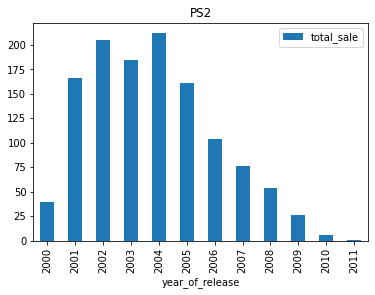

In [44]:
data.query('platform == "PS2"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='PS2')

*Периоды реализации платформы - с 2000 по 2011 включительно. *Пик продаж приходится на 2004 год.

Со второго года запуска платформы мы наблюдаем большой скачок продаж, следующие 3 года спрос держится на высоких позициях, однако он нестабилен. С 5 года продажи падают и через 6 лет платформу снимают с производства.


Жизненный цикл составил 12 лет, из них в последний год продажи были близки к 0.
Период активынх продаж составил 5 лет.

<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

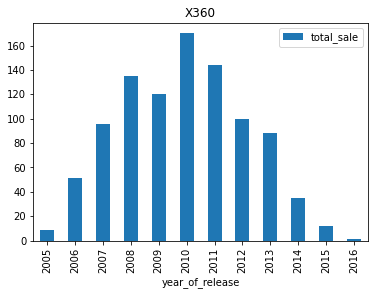

In [45]:
data.query('platform == "X360"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='X360')

*Периоды реализации платформы - с 2005 по 2016 включительно. *Пик продаж приходится на 2010 год.

Со первого года выпуска и до 4 включительно наблюдается рост продаж, в 5 году был спад, в 6 году продажи достигли пик. С 7 года спрос начал падать и через 5 лет платформу снимают с производства.


Жизненный цикл составил 12 лет, из них в последний год продажи были близки к 0.
Период активынх продаж составил 4 лет.

<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

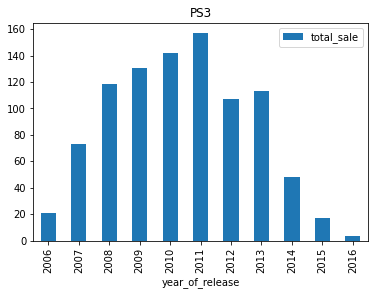

In [46]:
data.query('platform == "PS3"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='PS3')

*Периоды реализации платформы - с 2001 по 2016 включительно. *Пик продаж приходится на 2011 год.

Существенный прирос продаж начинается с 4 года запуска платформы, следующие 4 года спрос растет, с 9 года продажи существенно падают и через 4 года платформу снимают с производства.

Жизненный цикл составил 13 лет, из них в первые 2 года продажи были близки к 0. Период активынх продаж составил 4 года.

<AxesSubplot:title={'center':'Wii'}, xlabel='year_of_release'>

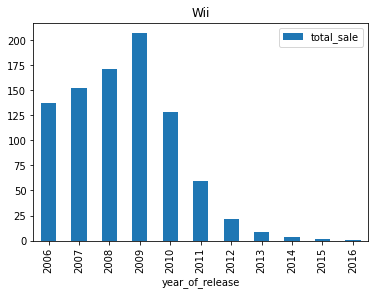

In [47]:
data.query('platform == "Wii"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='Wii')

*Периоды реализации платформы - с 2006 по 2016 включительно. *Пик продаж приходится на 2009 год.

С первого года запуска платформа пользуется большой популярностью, следующие 3 года спрос растет, с 5 года продажи начинают снижаться  и через 6 лет платформу снимают с производства.

Жизненный цикл составил 11 лет, из них в последний год продажи были близки к 0. Период активынх продаж составил 4 года.

<AxesSubplot:title={'center':'DS'}, xlabel='year_of_release'>

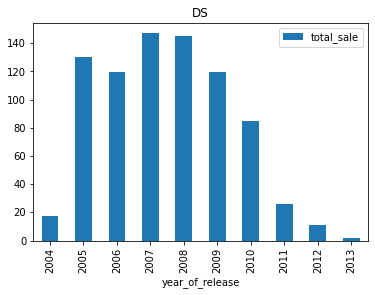

In [48]:
data.query('platform == "DS"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='DS')

*Периоды реализации платформы - с 2004 по 2013 включительно. *Пик продаж приходится на 2007 и 2008 годы.

Со второго года запуска платформа наблюдается существенный рост продаж, в 3 году был небольшой спад, следующие 2 года продажи держались на пике. С 5 год реализации начинается спад и через 4 лет платформу снимают с производства.

Жизненный цикл составил 10 лет. Период активынх продаж составил 5 лет.

<AxesSubplot:title={'center':'PS'}, xlabel='year_of_release'>

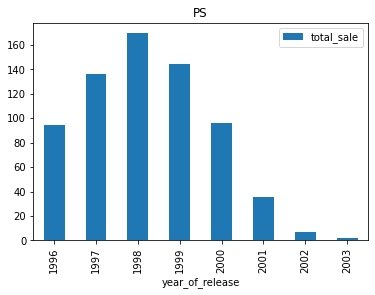

In [49]:
data.query('platform == "PS"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='PS')

*Периоды реализации платформы - с 1996 по 2003 включительно. *Пик продаж приходится на 1998 год.

С первого года выпуска и до 3 включительно наблюдается рост продаж, в 4 году начался спад и через 4 года платформу снимают с производства.

Жизненный цикл составил 8 лет. Период активынх продаж составил 5 лет.

<AxesSubplot:title={'center':'GBA'}, xlabel='year_of_release'>

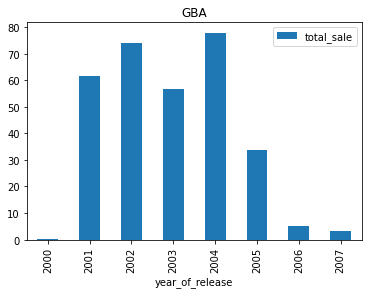

In [50]:
data.query('platform == "GBA"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='GBA')

<AxesSubplot:title={'center':'PS4'}, xlabel='year_of_release'>

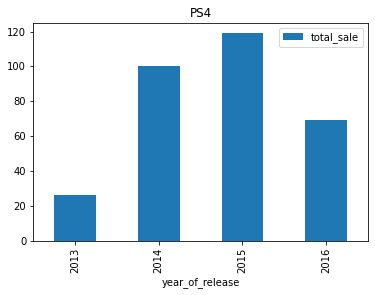

In [51]:
data.query('platform == "PS4"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='PS4')

<AxesSubplot:title={'center':'PSP'}, xlabel='year_of_release'>

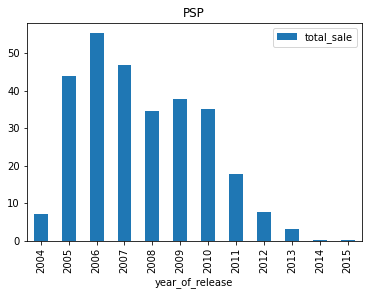

In [52]:
data.query('platform == "PSP"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='PSP')

<AxesSubplot:title={'center':'3DS'}, xlabel='year_of_release'>

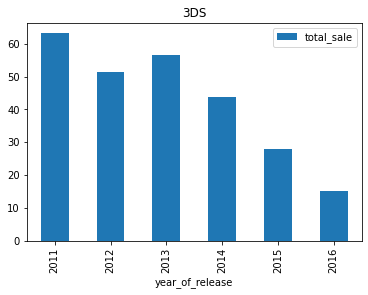

In [53]:
data.query('platform == "3DS"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='3DS')

<AxesSubplot:title={'center':'XB'}, xlabel='year_of_release'>

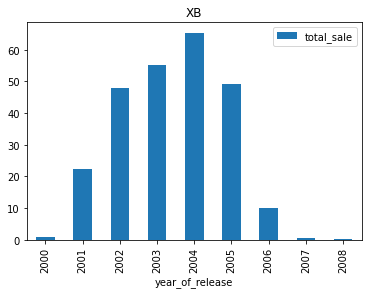

In [54]:
data.query('platform == "XB"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='XB')

<AxesSubplot:title={'center':'PC'}, xlabel='year_of_release'>

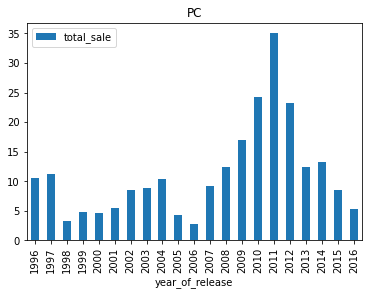

In [55]:
data.query('platform == "PC"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='PC')

<AxesSubplot:title={'center':'N64'}, xlabel='year_of_release'>

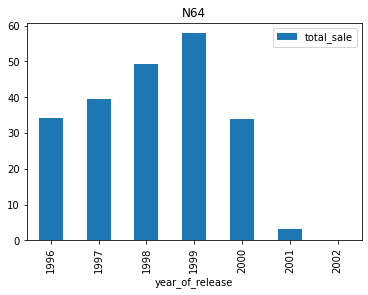

In [56]:
data.query('platform == "N64"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='N64')

<AxesSubplot:title={'center':'GC'}, xlabel='year_of_release'>

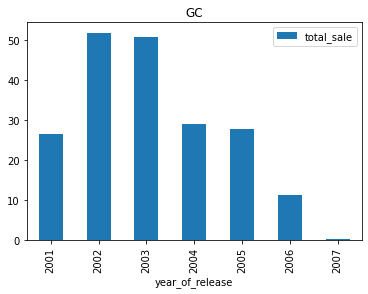

In [57]:
data.query('platform == "GC"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='GC'
)

<AxesSubplot:title={'center':'XOne'}, xlabel='year_of_release'>

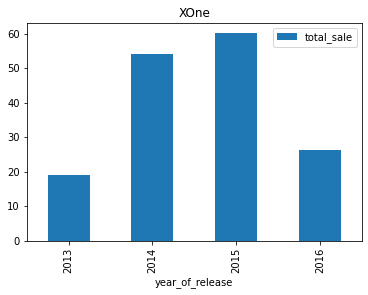

In [58]:
data.query('platform == "XOne"').pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='XOne')

Если посмотреть первые пять платформы с самыми большими продажами и 8-ую платформу PSP, то прослеживаются следующие закономерности: 
- жизненный цикл в среднем составляет 12 лет, если вычесть годы с продажами близкими к 0, то у всех он будет 10 лет;
- период активных продаж составляет 4-5 лет;
- активные продажи начинаются не с первого года, исключение платформа Wii;
- все платформы выпущены в 2000-х годах.

#### Определим, какой период будет являться актуальным.

<AxesSubplot:title={'center':'TOTAL'}, xlabel='year_of_release'>

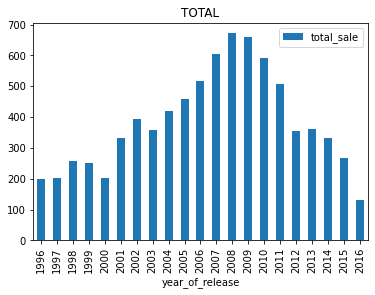

In [59]:
data.pivot_table(
    index = 'year_of_release', values = 'total_sale',aggfunc = 'sum').reset_index().plot(
    x = 'year_of_release', y = 'total_sale', kind='bar', title='TOTAL')


Актуальным периодом являет период с 2013г. по 2016 гг. включительно.

Данный период мы выбрали, т.к. период активных продаж длится 4 года и нужно анализировать последние годы, которые содержат актуальные тенденции. Данный период позволит выявить наиболее предпочтительные платформы.
   

#### Рассмотрим разброс продаж игр в разбивке по потенциальным платформам.

In [60]:
data_period_a = data.query('year_of_release > 2012')

In [61]:
data_period_a.pivot_table(
    index='platform', values='total_sale', aggfunc='sum').sort_values(by='total_sale')


,total_sale
platform,
DS,1.54
PSP,3.50
Wii,13.66
PSV,32.99
PC,39.43
WiiU,64.63
X360,136.80
3DS,143.25
XOne,159.32


[(0.0, 1.75)]

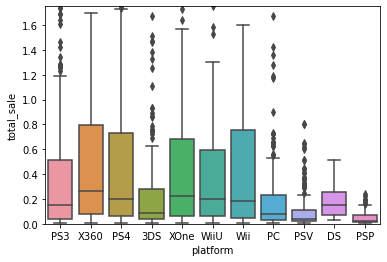

In [64]:
seaborn.boxplot(x='platform', y='total_sale', data=data_period_a).set(ylim=(0, 1.75))


В качестве самых перспективных выберем следующие платформы: X360, PS4, XOne, WiiU, PS3, 3DS.

PS4, PS3, XOne, 3DS, X360 - это платформы с наибольшим объемом продаж. 

Наиболее привлекательно выглядят X360 и PS4. Больше всего продано игр на платформе PS4 , при этом X360 имеет большие медиану и третий квантиль, хоть и на третьем месте по объемам продаж.
  
Игры на платформах XOne, WiiU, PS3 имеют большие объемы продаж и неплохие численные характеристики (квантили и медиану). 
    
У платформы 3DS похуже чиловые характеристики, однако она на 4 месте по количеству проданных копий. Возможно к этой  платформе есть повышенный спрос в отдельном регионе.
    
Не смотря на то, что у платформы Wii хорошие числовые характеристики, мы не относим её к перспективным, т.к. жизненный цикл этой платформы подходит к концу и скорее всего Wii снимут с производства.


#### Влияние отзывов на потенциальные платформы

#####  Влияние отзывов на платформу X360 

In [62]:
data_X360 = data_period_a.query(
    'platform == "X360" and critic_score != -1 and user_score != -1')

<AxesSubplot:title={'center':'Оценки критиков'}, xlabel='critic_score', ylabel='total_sale'>

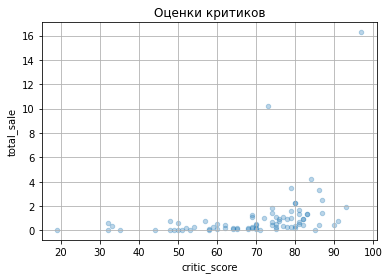

In [63]:
data_X360.plot(
    x='critic_score', y='total_sale', kind='scatter', title='Оценки критиков', grid=True, alpha=0.3)


Спрос на игры начинает повышаться от 70 баллов. Игры, копии которых продали более 4 млн., имеют не менее 70 баллов. 


In [64]:
data_X360['critic_score'].corr(data_X360['total_sale'])

0.3503445460228664


Корреляция в размере 0,35 говорит о низкой взаимосвязи объемов продаж и оценок критиков.


<AxesSubplot:title={'center':'Оценки пользователей'}, xlabel='user_score', ylabel='total_sale'>

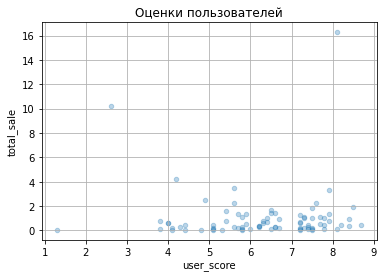

In [65]:
data_X360.plot(
    x='user_score', y='total_sale', kind='scatter', title='Оценки пользователей', grid=True, alpha=0.3)


На графике не видно роста спроса с увеличением баллов. 


In [66]:
data_X360['user_score'].corr(data_X360['total_sale'])

-0.006238179532306317


Корреляция в размере -0,01 говорит об отсутствии взаимосвязи объемов продаж и оценок пользователей.


#####  Влияние отзывов на платформу PS4

In [67]:
data_PS4 = data_period_a.query(
    'platform == "PS4" and critic_score != -1 and user_score != -1')

<AxesSubplot:title={'center':'Оценки критиков'}, xlabel='critic_score', ylabel='total_sale'>

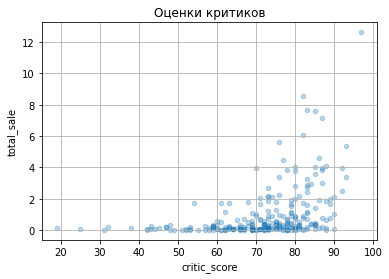

In [68]:
data_PS4.plot(
    x='critic_score', y='total_sale', kind='scatter', title='Оценки критиков', grid=True, alpha=0.3)

Спрос на игры начинает повышаться от 60 баллов. Игры, копии которых продали более 4 млн., имеют не менее 70 баллов.


In [69]:
data_PS4['critic_score'].corr(data_PS4['total_sale'])

0.40589480145836687


Корреляция в размере 0,41 говорит о небольшой взаимосвязи объемов продаж и оценок критиков.


<AxesSubplot:title={'center':'Оценки пользователей'}, xlabel='user_score', ylabel='total_sale'>

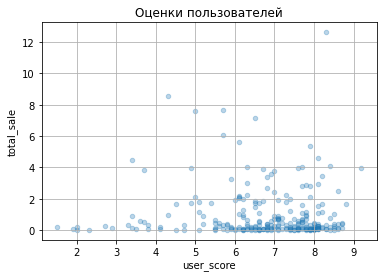

In [70]:
data_PS4.plot(
    x='user_score', y='total_sale', kind='scatter', title='Оценки пользователей', grid=True, alpha=0.3)


На графике не наблюдается связь между продажами и оценками пользователей.

In [71]:
data_X360['user_score'].corr(data_X360['total_sale'])

-0.006238179532306317


Корреляция в размере -0,01 говорит об отсутствии взаимосвязи объемов продаж и оценок пользователей.

#####  Влияние отзывов на платформу XOne

In [72]:
data_XOne = data_period_a.query(
    'platform == "XOne" and critic_score != -1 and user_score != -1')

<AxesSubplot:title={'center':'Оценки критиков'}, xlabel='critic_score', ylabel='total_sale'>

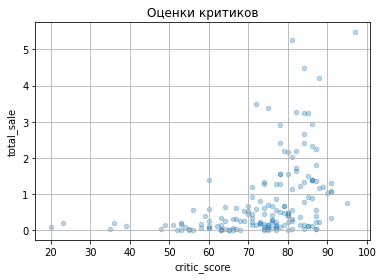

In [73]:
data_XOne.plot(
    x='critic_score', y='total_sale', kind='scatter', title='Оценки критиков', grid=True, alpha=0.3)


Спрос на игры начинает повышаться от 50 баллов. Игры, копии которых продали более 4 млн., имеют не менее 80 баллов.

In [74]:
data_XOne['critic_score'].corr(data_XOne['total_sale'])

0.41042203561296375


Корреляция в размере 0,42 говорит о небольшой взаимосвязи объемов продаж и оценок критиков.

<AxesSubplot:title={'center':'Оценки пользователей'}, xlabel='user_score', ylabel='total_sale'>

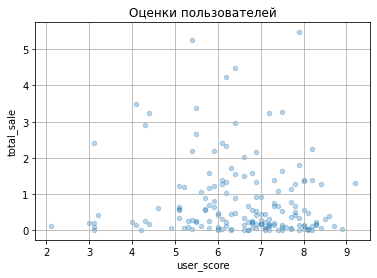

In [75]:
data_XOne.plot(
    x='user_score', y='total_sale', kind='scatter', title='Оценки пользователей', grid=True, alpha=0.3)


Спрос на игры начинает повышаться от 4 баллов. Игра, копии которой продали более 6 млн., имеют не менее 5 баллов.

In [76]:
data_XOne['user_score'].corr(data_XOne['total_sale'])

-0.09400318326920852


Корреляция в размере 0,09 говорит об отсутствии взаимосвязи объемов продаж и оценок пользователей.

#####  Влияние отзывов на платформу WiiU

In [77]:
data_WiiU = data_period_a.query(
    'platform == "WiiU" and critic_score != -1 and user_score != -1')

<AxesSubplot:title={'center':'Оценки критиков'}, xlabel='critic_score', ylabel='total_sale'>

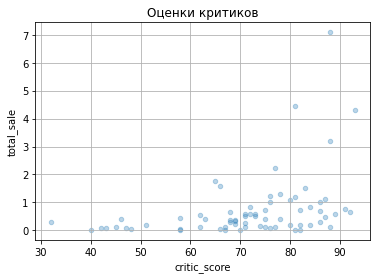

In [78]:
data_WiiU.plot(
    x='critic_score', y='total_sale', kind='scatter', title='Оценки критиков', grid=True, alpha=0.3)


Спрос на игры начинает повышаться от 60 баллов. Игры, копии которых продали более 4 млн., имеют не менее 80 баллов.

In [79]:
data_WiiU['critic_score'].corr(data_WiiU['total_sale'])

0.37950449899784144


Корреляция в размере 0,38 говорит о низкой взаимосвязи объемов продаж и оценок критиков.

<AxesSubplot:title={'center':'Оценки пользователей'}, xlabel='user_score', ylabel='total_sale'>

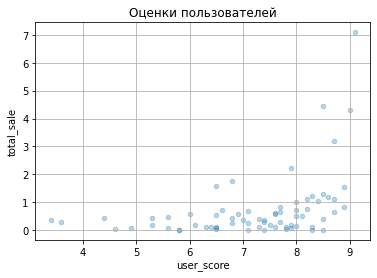

In [82]:
data_WiiU.plot(
    x='user_score', y='total_sale', kind='scatter', title='Оценки пользователей', grid=True, alpha=0.3)


Спрос на игры начинает повышаться от 5 баллов. Игры, копии которых продали более 4 млн., имеют не менее 8 баллов.

In [81]:
data_WiiU['user_score'].corr(data_WiiU['total_sale'])

0.40869174384926477

<div class="alert alert-block alert-info">
Корреляция в размере 0,40 говорит о небольшой взаимосвязи объемов продаж и оценок пользователей.


#####  Влияние отзывов на платформу PS3

In [83]:
data_PS3 = data_period_a.query(
    'platform == "PS3" and critic_score != -1 and user_score != -1')

<AxesSubplot:title={'center':'Оценки критиков'}, xlabel='critic_score', ylabel='total_sale'>

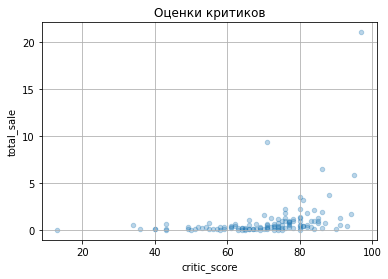

In [84]:
data_PS3.plot(
    x='critic_score', y='total_sale', kind='scatter', title='Оценки критиков', grid=True, alpha=0.3)


Спрос на игры начинает повышаться от 70 баллов. Игры, копии которых продали более 4 млн., имеют не менее 70 баллов.

In [85]:
data_PS3['critic_score'].corr(data_PS3['total_sale'])

0.33380663565061736


Корреляция в размере 0,33 говорит о низкой взаимосвязи объемов продаж и оценок критиков.

<AxesSubplot:title={'center':'Оценки пользователей'}, xlabel='user_score', ylabel='total_sale'>

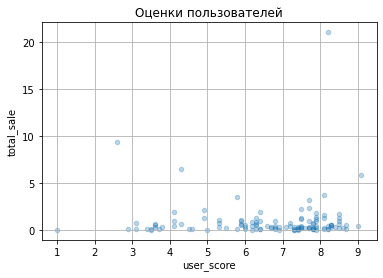

In [86]:
data_PS3.plot(
    x='user_score', y='total_sale', kind='scatter', title='Оценки пользователей', grid=True, alpha=0.3)


На графике не наблюдается связь между продажами и оценками пользователей.

In [87]:
data_PS3['user_score'].corr(data_PS3['total_sale'])

0.02269094327112414


Корреляция в размере 0,02 говорит о крайне низкой взаимосвязи объемов продаж и оценок пользователей.

#####  Влияние отзывов на платформу 3DS

In [88]:
data_3DS = data_period_a.query(
    'platform == "3DS" and critic_score != -1 and user_score != -1')

<AxesSubplot:title={'center':'Оценки критиков'}, xlabel='critic_score', ylabel='total_sale'>

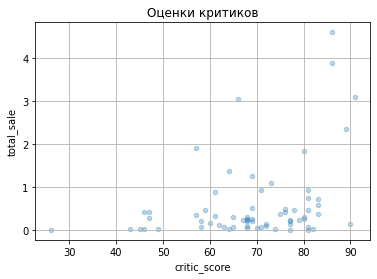

In [89]:
data_3DS.plot(
    x='critic_score', y='total_sale', kind='scatter', title='Оценки критиков', grid=True, alpha=0.3)


Спрос на игры начинает повышаться от 60 баллов. Игры, копии которых продали более 4 млн., имеют не менее 85 баллов.

In [90]:
data_3DS['critic_score'].corr(data_3DS['total_sale'])

0.3392349287853147


Корреляция в размере 0,34 говорит об отсутствии взаимосвязи объемов продаж и оценок критиков.

<AxesSubplot:title={'center':'Оценки пользователей'}, xlabel='user_score', ylabel='total_sale'>

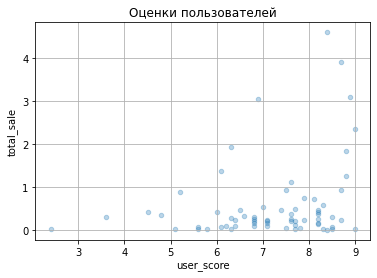

In [91]:
data_3DS.plot(
    x='user_score', y='total_sale', kind='scatter', title='Оценки пользователей', grid=True, alpha=0.3)


Спрос на игры начинает повышаться от 6 баллов. Игры, копии которых продали более 4 млн., имеют не менее 8 баллов.

In [92]:
data_3DS['user_score'].corr(data_3DS['total_sale'])

0.2729904366942444


Корреляция в размере 0,27 говорит об отсутствии взаимосвязи взаимосвязи объемов продаж и оценок пользователей.


Прослеживается небольшая положительная зависимость продаж и оценок критиков.

Зависимость между продажами и оценками пользователей игр на базе платформ PS3, PS4, Ч360 и XOne отсутствует, на базе платформ WiiU и 3DS небольшая зависимость имеется.

####  Распределение по жанрам

Для исследования продаж по жанрам проведм для 7 потенциальных платформ.

In [93]:
data_new =(
    data_period_a[data_period_a['platform'].isin(['X360', 'PS4', 'XOne', 'WiiU', 'PS3', '3DS'])]
)

In [94]:
display(data_new.pivot_table(
    index = 'genre', values = 'total_sale', aggfunc = 'sum').sort_values(by='total_sale'))

,total_sale
genre,
Puzzle,3.11
Strategy,4.42
Simulation,13.25
Adventure,18.76
Fighting,34.00
Racing,38.82
Platform,39.15
Misc,50.95
Role-Playing,129.76


In [97]:
data_genre =(
    data_new[data_new['genre'].isin(
        ['Action', 'Sports', 'Misc', 'Shooter','Platform', 'Racing', 'Role-Playing', 'Fighting'])]
)

[(0.0, 4.15)]

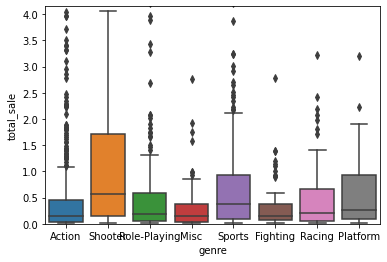

In [96]:
seaborn.boxplot(x='genre', y='total_sale', data=data_genre).set(ylim=(0, 4.15))


Самым перспективным является жанр 'Shooter', все его квантили существенно выше остальных и по объемам продаж он на 2 месте. Это значит, что вероятность получить объемы продаж выше, а малые объем - ниже.

На втором месте 'Sports', на третьем -  'Platform'.

Четвертое место поделили 'Racing', 'Role-Playing', 'Action'. 'Action' имеет самые большие объемы продаж из всех жанров, однако в сравнении с жанрами четвертого места самые малые квантили.
  
На пятом -  'Misc', на шестом - 'Fighting'.

In [98]:
data_genre =(
    data_genre[data_genre['genre']
               .isin(['Action', 'Sports', 'Misc', 'Shooter','Platform', 'Racing', 'Role-Playing', 'Fighting'])]
)

In [99]:
data_genre.pivot_table(index='genre', columns='platform', values='total_sale', aggfunc='sum')

platform,3DS,PS3,PS4,WiiU,X360,XOne
genre,,,,,,
Action,34.04,70.92,96.10,14.75,47.59,37.31
Fighting,8.21,6.05,8.65,6.09,2.55,2.45
Misc,7.10,8.36,8.19,7.38,12.49,7.43
Platform,8.79,3.33,7.69,16.27,2.14,0.93
Racing,NaN,6.46,12.14,7.36,3.07,9.79
Role-Playing,67.37,16.49,28.99,1.93,4.43,10.55
Shooter,0.06,31.79,88.56,5.48,35.48,60.33
Sports,1.82,32.35,55.61,2.46,25.96,26.74



В жанре Shooter чаще используют платформы PS4, реже XOne, X360 и PS3. 

В жанре Sports чаще используют платформы PS4, PS3, XOne и X360.

В жанре Platform чаще используют платформы WiiU.

В жанре Racing чаще используют платформы PS4. 

В жанре Role-Playing чаще используют платформы 3DS, значительно реже PS4.

В жанре Action чаще используют платформы PS4, реже на PS3 и в 2 разе меньше на X360, XOne и 3DS.

В жанре Misc чаще используют платформы X360.
  
В жанре Fighting чаще используют платформы PS4 и 3DS.

###  Портрет пользователя каждого региона

####  Самые популярные платформы в регионах

Для анализа мы будем использовать отсортированный датафрейм по актуальному периоду и для потенциальных платформ.

Суммарные продажи по регионам

In [100]:
data_genre['na_sales'].sum()

402.63

In [101]:
data_genre['eu_sales'].sum()

339.69000000000005

In [102]:
data_genre['jp_sales'].sum()

108.59

In [103]:
data_genre['other_sales'].sum()

109.12

#####  Северная Америка

In [104]:
data_genre_na = data_genre.query('na_sales != 0')

In [105]:
data_genre_na.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales')

,na_sales
platform,
WiiU,27.89
3DS,35.30
PS3,61.76
X360,80.01
XOne,91.26
PS4,106.41


[(0.0, 1.4)]

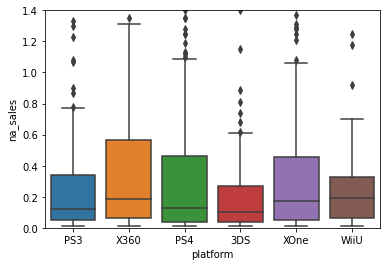

In [106]:
seaborn.boxplot(
    x='platform', y='na_sales', data=data_genre_na).set(ylim=(0, 1.4))


ТОП-5 Северной Америки:

1. X360

2. PS4

3. XOne

4. PS3

5. Wii

In [107]:
data_genre_eu = data_genre.query('eu_sales != 0')

In [108]:
data_genre_eu.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')

,eu_sales
platform,
WiiU,18.99
3DS,26.25
X360,41.36
XOne,50.00
PS3,65.91
PS4,137.18


[(0.0, 1.35)]

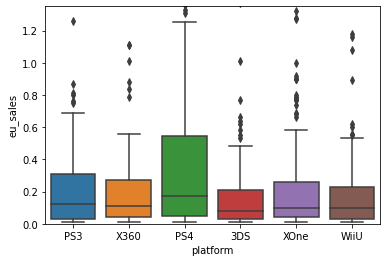

In [109]:
seaborn.boxplot(
    x='platform', y='eu_sales', data=data_genre_eu).set(ylim=(0, 1.35))


ТОП-5 Европы:

1. PS4	

2. PS3	

3. XOne

4. X360

5. WiiU

##### Япония

In [110]:
data_genre_jp = data_genre.query('jp_sales != 0')

In [111]:
data_genre_jp.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')

,jp_sales
platform,
XOne,0.31
X360,0.49
WiiU,10.37
PS4,15.17
PS3,22.04
3DS,60.21


[(0.0, 0.5)]

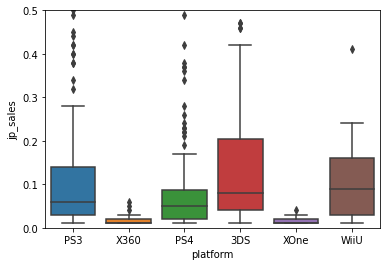

In [112]:
seaborn.boxplot(
    x='platform', y='jp_sales', data=data_genre_jp).set(ylim=(0, 0.5))

In [113]:
data_genre_jp.loc[data_genre_jp['platform'] == 'X360', 'jp_sales'].describe()

count    30.000000
mean      0.016333
std       0.012726
min       0.010000
25%       0.010000
50%       0.010000
75%       0.020000
max       0.060000
Name: jp_sales, dtype: float64

In [114]:
data_genre_jp.loc[data_genre_jp['platform'] == 'XOne', 'jp_sales'].describe()

count    20.000000
mean      0.015500
std       0.009445
min       0.010000
25%       0.010000
50%       0.010000
75%       0.020000
max       0.040000
Name: jp_sales, dtype: float64


ТОП-5 Японии:

1. 3DS (c большим отрывом)	 

2. PS3	
    
3. WiiU
    
4. PS4
    
5. X360 (с существенным отставанием)

##### Другие страны

In [115]:
data_genre_other = data_genre.query('other_sales != 0')

In [116]:
data_genre_other.pivot_table(
    index='platform', values='other_sales', aggfunc='sum').sort_values(by='other_sales')

,other_sales
platform,
WiiU,4.47
3DS,5.63
X360,11.85
XOne,13.96
PS3,26.04
PS4,47.17


[(0.0, 0.32)]

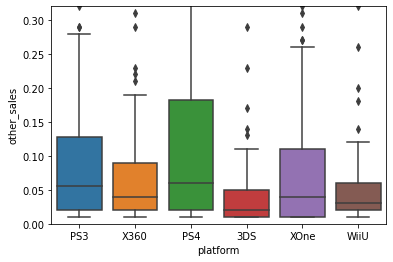

In [117]:
seaborn.boxplot(
    x='platform', y='other_sales', data=data_genre_other).set(ylim=(0, 0.32))


ТОП-5 других стран:
    
1. PS4
   
2. PS3
   
3. XOne	
   
4. X360	
    
5. WiiU	


Построим круговые диаграммы пользователей из разных регионов в одном ряду, так можно будет легко анализировать и сравнивать игроков между собой.

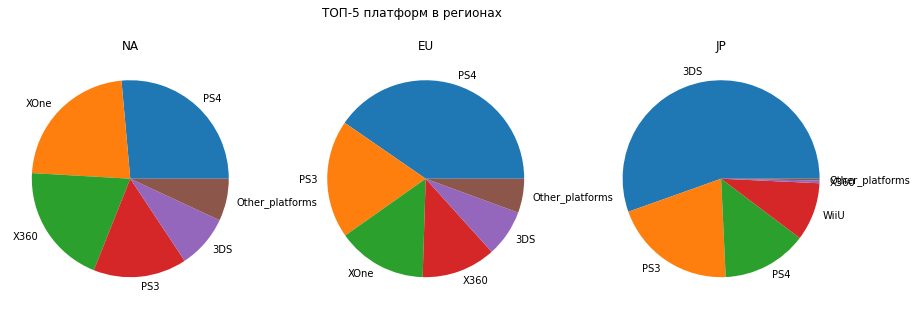

In [118]:
countries = data_genre.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (data_genre.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: data_genre[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()


Состав ТОП-5 в Европе и остальных странах одинаковый, где предпочитают PS4. Также по составу их ТОП-5 похож с Северной Америкой, отличается порядок платформ. В Северной Америке на первом месте X360, PS4 на втором (однако PS4 лидирует по объемам продаж).

В Японии с существенным отрывом лидирует платформа 3DS. Во всех остальных странах эта платформа не входит в ТОП-5.

Северная Америка и Европа наиболее привлекательные регионы, т.к. там объемы продаж самые большие.

####  Самые популярные жанры

Ранее мы определили выборку с наибольшими продажами в разрезе жанров. В соответствии с эти списком отфильтруем жанры.

#####  Северная Америка

In [119]:
data_genre_na.pivot_table(
    index='genre', columns='platform', values='na_sales', aggfunc='sum')

platform,3DS,PS3,PS4,WiiU,X360,XOne
genre,,,,,,
Action,8.60,23.65,32.83,7.37,27.27,21.37
Fighting,3.39,1.76,3.60,3.19,1.69,1.65
Misc,1.24,3.25,3.14,2.63,8.06,4.77
Platform,3.41,1.30,2.45,7.64,1.24,0.51
Racing,NaN,1.43,2.61,3.28,1.24,4.36
Role-Playing,18.42,5.71,9.34,0.68,2.77,6.15
Shooter,NaN,12.26,32.66,2.08,22.11,36.86
Sports,0.24,12.40,19.78,1.02,15.63,15.59


[(0.0, 1.6)]

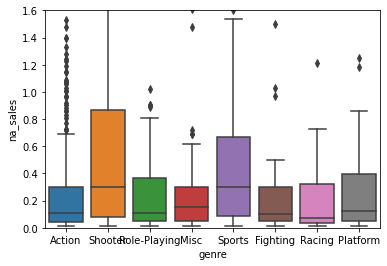

In [120]:
seaborn.boxplot(
    x='genre', y='na_sales', data=data_genre_na).set(ylim=(0, 1.6))


ТОП-5 жанров Северной Америки:
    
1.Shooter (XOne, PS4)	
    
2.Sports (PS4)
    
3.Action (PS4) (т.к. самые большие объемы продаж и большая часть выбросов рядом с 4 квантилем)
    
4.Role-Playing	(3DS)
    
5.Platform (WiiU)

##### Европа

In [121]:
data_genre_eu.pivot_table(
    index='genre', columns='platform', values='eu_sales', aggfunc='sum')

platform,3DS,PS3,PS4,WiiU,X360,XOne
genre,,,,,,
Action,6.97,26.81,42.71,5.22,15.99,12.58
Fighting,1.40,1.34,2.97,1.42,0.63,0.54
Misc,1.80,3.15,3.35,2.32,3.28,2.00
Platform,2.98,1.45,3.60,5.01,0.70,0.34
Racing,NaN,3.47,7.45,2.27,1.54,4.58
Role-Playing,12.34,3.73,11.96,0.47,1.24,3.43
Shooter,0.06,12.97,39.16,1.52,10.00,17.80
Sports,0.70,12.99,25.98,0.76,7.98,8.73


[(0.0, 1.5)]

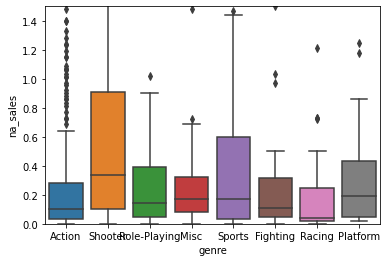

In [122]:
seaborn.boxplot(
    x='genre', y='na_sales', data=data_genre_eu).set(ylim=(0, 1.5))

In [123]:
data_genre_eu.loc[data_genre_eu['genre'] == 'Action', 'na_sales'].describe()

count    399.000000
mean       0.297043
std        0.723756
min        0.000000
25%        0.030000
50%        0.100000
75%        0.280000
max        9.660000
Name: na_sales, dtype: float64


ТОП-5 жанров Европы:
    
1.Shooter (PS4)
    
2.Sports (PS4)
    
3.Action (PS4)
    
4.Role-Playing (3DS, PS4)
    
5.Platform (WiiU)

##### Япония

In [124]:
data_genre_jp.pivot_table(
    index='genre', columns='platform', values='jp_sales', aggfunc='sum')

platform,3DS,PS3,PS4,WiiU,X360,XOne
genre,,,,,,
Action,17.09,9.60,5.90,0.96,0.18,0.05
Fighting,2.92,2.29,0.75,1.00,0.01,0.01
Misc,3.81,0.69,0.42,1.99,0.02,0.01
Platform,1.81,0.04,0.49,2.41,NaN,NaN
Racing,NaN,0.61,0.26,1.28,0.01,0.05
Role-Playing,33.77,5.14,3.55,0.67,0.03,0.01
Shooter,NaN,1.82,2.81,1.54,0.23,0.16
Sports,0.81,1.85,0.99,0.52,0.01,0.02


[(0.0, 0.41)]

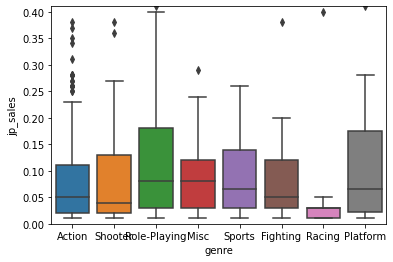

In [125]:
seaborn.boxplot(
    x='genre', y='jp_sales', data=data_genre_jp).set(ylim=(0, 0.41))


ТОП-5 жанров Японии:
       
1.Role-Playing (3DS)
    
2.Action (3DS)
    
3.Platform (WiiU, 3DS)
    
4.Shooter (PS4)
    
5.Sports (PS3)

#####  Другие страны

In [126]:
data_genre_other.pivot_table(
    index='genre', columns='platform', values='other_sales', aggfunc='sum')

platform,3DS,PS3,PS4,WiiU,X360,XOne
genre,,,,,,
Action,1.38,10.86,14.66,1.20,4.15,3.31
Fighting,0.50,0.66,1.33,0.48,0.22,0.25
Misc,0.25,1.27,1.28,0.44,1.13,0.65
Platform,0.59,0.54,1.15,1.21,0.20,0.08
Racing,NaN,0.95,1.82,0.53,0.28,0.80
Role-Playing,2.84,1.91,4.14,0.11,0.39,0.96
Shooter,NaN,4.74,13.93,0.34,3.14,5.51
Sports,0.07,5.11,8.86,0.16,2.34,2.40


[(0.0, 0.35)]

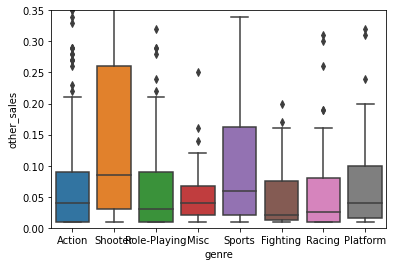

In [127]:
seaborn.boxplot(
    x='genre', y='other_sales', data=data_genre_other).set(ylim=(0, 0.35))

В остальных странах наиболее перспективны игры жанра Shooter, на втором месте  Sports и на 3-м Action, т.к у Sports третий квантиль больше.


ТОП-5 жанров других стран:
       
1.Shooter (PS4)
    
2.Sports (PS4)
    
3.Action (PS4)
    
4.Role-Playing (PS4)
    
5.Platform (WiiU, PS4) 


В Северной Америке, Европе и в остальных страных (за исключением Японии) одинаковые предпочтения по жанрам - на первом месте Shooter. В этих регионах в играх популярных жанров используется чаще всего платформа PS4.
    
В Японии отличается выбор жанров - на первом месте Role-Playing, чаще используют для популярных жанров платфому 3DS. 

#### Влияние рейтинга ESRB на продажи в регионах.

Информация по рейтингам:
- Е - для всех;
- М - для взрослых;
- Т - для подростков;
- У10+ - для всех от 10 лет и старше;
- EC - для детей младшего возраста.

##### Севреная Америка

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

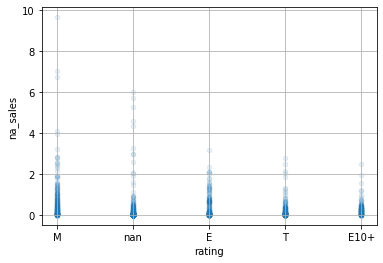

In [128]:
data_genre.plot(x='rating', y='na_sales', kind='scatter', grid=True, alpha=0.1)


В Северной Америка рейтинг ESRB влияет на продажи следующим образом - чем выше возрастной ценз, тем больше продаж.

##### Европа

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

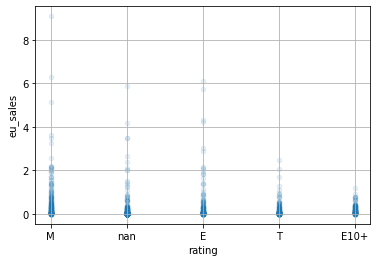

In [129]:
data_genre.plot(x='rating', y='eu_sales', kind='scatter', grid=True, alpha=0.1)


В Европе рейтинг ESRB влияет на продажи следующим образом - чем выше возрастной ценз, тем больше продаж.

##### Япония

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

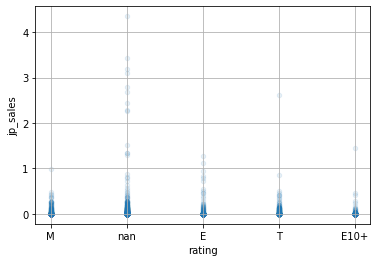

In [130]:
data_genre.plot(x='rating', y='jp_sales', kind='scatter', grid=True, alpha=0.1)


В Японии зависимость между рейтингом ESRB и продажами не прослеживается. 

##### Другие страны

<AxesSubplot:xlabel='rating', ylabel='other_sales'>

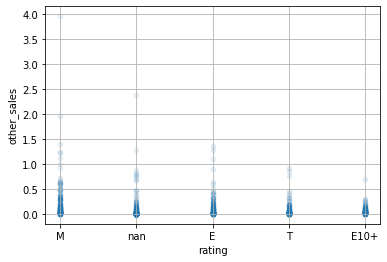

In [131]:
data_genre.plot(x='rating', y='other_sales', kind='scatter', grid=True, alpha=0.1)


В остальных странах рейтинг ESRB влияет на продажи следующим образом - чем выше возрастной ценз, тем больше продаж. 


Во всех странах, за исключением Японии, чем выше возрастной ценз, тем больше продаж. 

В Японии этой зависимоти нет, больше всего продаж там где пропуски. Видимо, лучше продаются игры без рейтинга ESRB.

### Проверка гипотез

#### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = среднему пользовательскому рейтингу (user_score) платформы PC
H_a: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ среднему пользовательскому рейтингу (user_score) платформы PC
```

In [132]:
data_new = data_period_a.query('critic_score != -1 and user_score != -1')

In [133]:
data_new.loc[(data_new['platform'] == 'XOne') & (data_new['total_sale'] > 0), 'user_score'].describe()

count    165.000000
mean       6.538182
std        1.340298
min        2.100000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [134]:
data_new.loc[(data_new['platform'] == 'PC') & (data_new['total_sale'] > 0), 'user_score'].describe()

count    148.000000
mean       6.302027
std        1.712438
min        1.400000
25%        5.375000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [137]:
results = st.ttest_ind(
    data_new.loc[data_new['platform'] == 'XOne', 'user_score'],
    data_new.loc[data_new['platform'] == 'PC', 'user_score']
) 

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.17306926618147322
Не получилось отвергнуть нулевую гипотезу



Гипотеза не отвергнута, это значит, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [138]:
data_new.loc[(data_new['genre'] == 'Action') & data_new['total_sale'] > 0, 'user_score'].describe()

count    309.000000
mean       6.936246
std        1.283049
min        2.000000
25%        6.400000
50%        7.300000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [139]:
data_new.loc[(data_new['genre'] == 'Sports') & data_new['total_sale'] > 0, 'user_score'].describe()

count    110.000000
mean       5.665455
std        1.460014
min        1.500000
25%        4.650000
50%        5.850000
75%        6.675000
max        8.700000
Name: user_score, dtype: float64

In [140]:
results = st.ttest_ind(
    data_new.loc[data_new['genre'] == 'Action', 'user_score'],
    data_new.loc[data_new['genre'] == 'Sports', 'user_score']
) 

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.684099430689953e-16
Отвергаем нулевую гипотезу



Гипотеза отвергнут, это значит, что средние пользовательские рейтинги жанров Action и Sports разные.

Нулевую гипотезу мы сформулировали исходя из той логики, что в ней должен присутствовать знак равенства. Альтернативная гипотеза подразумевает неравенство средних двух выборок и в нашем случае не важно в какую сторону будет отклонение, в большую или меньшую.

Для проверки гипотезы выбрали метод st.ttest_ind, т.к. мы сравниваем среднее двух независымых генеральных совокупностей.

### Общие выводы


В Северной Америке, Европе и в остальных страных (за исключением Японии) одинаковые предпочтения по жанрам игр и платформ, на которых они базируются. В этих регионах наиболее перспективны платформы PS2 и XOne, а жанр - hooter. 
    
В Японии отличается выбор, так жанр Role-Playing, а платформа - 3DS.


Факторы, определяющие успешность игры:
    

- платформа, на которой базируется игра;
    
- жанр игры;
    
- регион, в котором будет продаваться игра;
    
- рейтинг ESRB - чем выше возрастной ценз, тем больше продаж (за исключением Японии);
    
- на сколько давно реализуется платформа (не снимут ли её с производства). 

Отзывы критиков и пользователей существенного влияния на продажи не оказывают. В единичных случаях имеются большие продажи копий при высоких баллах, однако это не является закономерность.